# Challenge - Chemicals Segregation (Binary Classification Challenge)
A chemist has two chemical flasks labelled 1 and 0 which contains two different chemicals. He extracted 3 features from these chemicals in order to distinguish between them. You are provided with the results derived by the chemist and your task is to create a model that will label chemical 0 or 1 given its three features.

### Data Description
- You are provided with two files test and train.
- Train: This files consists of two csv files LogisticXtrain and LogisticYtrain. Xtrain consists of the features whereas Ytrain consists of the labels associated with the features.
- Test: This file consists of two files LogisticXtest consisting of the features of test data and sample_output which represents in which format your solution csv must be submitted.
- You need to implement any classifier from scratch, don't use any sklearn based classifier.

### Before submitting 
- The column names or headers of submission file must match with that given in sample submission file.

- Datatype of the columns of submission file must match with that of the given sample_submission file.

- The number of rows must be equal to given test cases and number of columns must be equal to the columns given in the sample submission file.


#### Preparing dataset

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
X_train = pd.read_csv('.\Chemical_seg_dataset\Logistic_X_Train.csv').values
y_train = pd.read_csv('.\Chemical_seg_dataset\Logistic_Y_Train.csv').values

X_test = pd.read_csv('.\Chemical_seg_dataset\Logistic_X_Test.csv').values

print (X_train.shape, y_train.shape)

(3000, 3) (3000, 1)


In [32]:
#Data normalization
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)

X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

#### Implementing Logistic Regression

In [33]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

def gradient(X,y,theta):
    m = X.shape[0]
    hi = hypothesis(X,theta)
    return (1/m) * np.dot(X.T, (hi - y))


def error(X, y, theta):   # can be excluded
    hi = hypothesis(X, theta)
    e = -1 * np.mean(y*np.log(hi) + ((1-y)*np.log(1-hi)))

    return e


def gradient_descent(X, y, lr=0.1, max_itr = 1000):
    n = X.shape[1]
    theta = np.zeros((n,1))

    error_list = [] # To store error at each iteration

    for i in range(max_itr):
        e = error(X, y, theta)
        error_list.append(e)

        grad = gradient(X, y, theta)
        theta = theta - lr * grad

    return theta, error_list

In [34]:
# Adding bias term
ones = np.ones((X_train.shape[0],1))
X_new_train = np.hstack((ones, X_train))  # adding a column of ones to X_train for bias term

y_train = y_train.reshape((-1,1))

In [35]:
theta, error_list = gradient_descent(X_new_train, y_train)

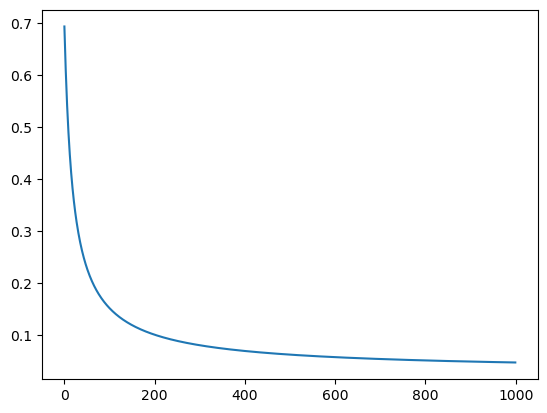

In [36]:
plt.plot(error_list)

In [37]:
theta

array([[-0.5300282 ],
       [-3.16823469],
       [ 1.84554244],
       [-2.59861463]])

#### Visualzation and accuracy

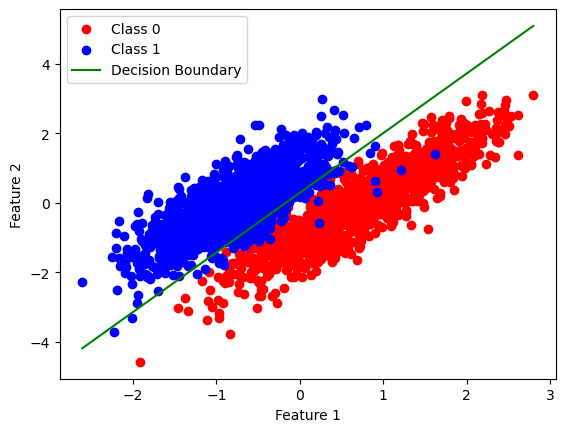

In [38]:
#Just for visualization

# Assume X_train is (m,2) after selecting only 2 features
# y_train is (m,1)
# theta is learned parameter vector (3,1) [bias + 2 weights]

# Scatter plot
plt.scatter(X_train[y_train.flatten()==0, 0], X_train[y_train.flatten()==0, 1], 
            color='red', label='Class 0')
plt.scatter(X_train[y_train.flatten()==1, 0], X_train[y_train.flatten()==1, 1], 
            color='blue', label='Class 1')

# Decision boundary
x1_vals = np.linspace(X_train[:,0].min(), X_train[:,0].max(), 100)
x2_vals = -(theta[0] + theta[1]*x1_vals) / theta[2]   # line formula

plt.plot(x1_vals, x2_vals, color='green', label='Decision Boundary')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [40]:
# Prediction and accuracy
X_new_test = np.hstack((np.ones((X_test.shape[0],1)), X_test))

In [41]:
def  predict(X,theta):
    h = hypothesis(X,theta)
    output = np.zeros(h.shape)
    output[h>=0.5] = 1
    output = output.astype('int')

    return output

XT_preds = predict(X_new_train, theta)
Xt_preds = predict(X_new_test, theta)

In [42]:
def accuracy(actual,preds):
    actual = actual.astype('int')
    actual = actual.reshape((-1,1))
    acc = np.sum(actual==preds)/actual.shape[0]

    return acc*100

In [43]:
accuracy(y_train, XT_preds)

np.float64(99.36666666666667)

#### Exporting submission csv file

In [44]:
#Exporting test predictions
# Ensure Xt_preds is 1D
Xt_preds = Xt_preds.flatten()

# Create dataframe with only 'Label' column
submission = pd.DataFrame({
    "label": Xt_preds
})

# Save to CSV
submission.to_csv("Chemical_seg_submission.csv", index=False)

print(submission.head())

   label
0      1
1      1
2      0
3      1
4      1
